# QS3 Electronic absorption spectrum of I$_2$

## Importing data
Download your data from Moodle and import it as well as the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.optimize as opt 
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import data
data_A = pd.read_csv('A.csv',skiprows=1,nrows=1001)
data_B = pd.read_csv('B.csv',skiprows=1,nrows=1001)
data_C = pd.read_csv('C.csv',skiprows=1,nrows=1001)
data_D = pd.read_csv('D.csv',skiprows=1,nrows=1001)
data_E = pd.read_csv('E.csv', skiprows=1, nrows=10001)

Check your data has imported correctly:

In [2]:
data_E

,Wavelength (nm),Abs,Unnamed: 2
0,700.000000,-0.346690,NaN
1,699.979981,-0.418402,NaN
2,699.960022,-0.456006,NaN
3,699.940002,-0.460229,NaN
4,699.919983,-0.461603,NaN
...,...,...,...
9996,500.080017,0.096259,NaN
9997,500.059998,0.096486,NaN
9998,500.040008,0.096021,NaN
9999,500.020020,0.096109,NaN


Plot the experimental spectra, `A.csv, B.csv, C.csv, D.csv` and `E.csv`. Inspect the metadata at the tail of the files and adjust the code such that the slit bandwidth is indicated in the plot legend.

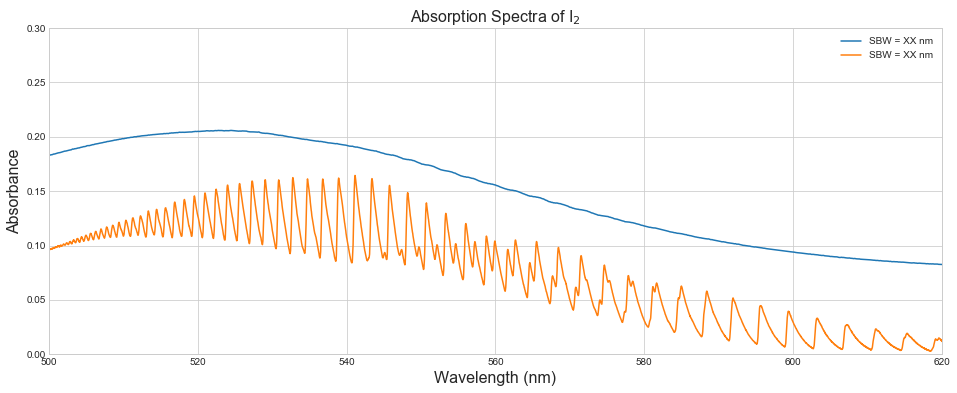

In [3]:
# Plot data
x_A = data_A['Wavelength (nm)']
y_A = data_A['Abs']
#x_B = 
#y_B = 
#x_C = 
#y_C = 
#x_D = 
#y_D = 
x_E = data_E['Wavelength (nm)'] 
y_E = data_E['Abs']

fig = plt.figure(figsize=(16,6))
plt.plot(x_A,y_A,label='SBW = XX nm') #update
#plt.plot(x_B,y_B,label='SBW = XX nm') #update
#plt.plot(x_C,y_C,label='SBW = XX nm') #update
#plt.plot(x_D,y_D,label='SBW = XX nm') #update
plt.plot(x_E,y_E,label='SBW = XX nm') #update

xmin = 500
xmax = 620 

plt.xlabel('Wavelength (nm)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Absorption Spectra of I$_2$", size=16)
plt.xlim(xmin,xmax)
plt.ylim(0,0.3)
plt.legend()
plt.show()

## Choose a Dataset and Pick the Peaks

Select the highest resolution spectrum for further analysis *(choose the dataset A, B, C, D or E)*.

In [4]:
x = x_E
y = y_E

Use the code below to pick the peak positions by adjusting the prominence and distance parameters within the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. Make sure that as many peaks have been picked as possible. Extra peaks or false peaks do not matter at this stage.

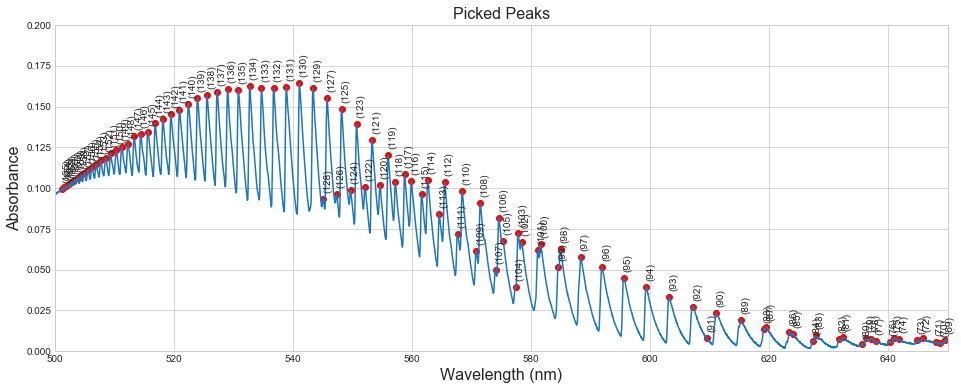

In [5]:
peaks = sg.find_peaks(y,prominence=0.0005, distance=10) # Adjust the parameters

fig = plt.figure(figsize=(16,6))
plt.plot(x[peaks[0]],y[peaks[0]],"ro")
plt.plot(x,y)
xmin = 500
xmax = 650
ymin = 0.0
ymax = 0.2
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Labelling the picked peaks
for i in range(len(peaks[0])):
    if x[peaks[0][i]] > xmin and x[peaks[0][i]] < xmax:
        stri = '({})'.format(i)
        plt.text(x[peaks[0][i]],y[peaks[0][i]]+0.005,stri,rotation=90)

plt.xlabel('Wavelength (nm)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Picked Peaks", size=16)
plt.show()

Figure 4 in the instructions details the region where the three progressions overlap. Ensure that as many peaks as possible have been picked in this region. Each peak will now have an **index** which you will use below to assign the peaks to progressions.

> **Do not continue until you have as many of the clear peaks picked as possible.**

---

## Analysis of the main progression

With the aid of Figures 2 and 4 in the instructions, **identify the bands which belong to the $v'' = 0$ (i.e. main) progression.** Note the smooth variation of intensity for the bands within each progression. You can use this as an aid in assigning features to particular progressions. 

Next you will **assign the picked peaks for the main progression** $v'' = 0$. You will do this by listing the indices of the peaks in the array `s0`. 

*For example, the peaks above with indices 141 and 140 have been added to the array. In the plot below they have been labelled (almost certainly incorrectly) as 6-0 and 5-0 respectively, with their wavelength.*

Take care in the region 550 – 580 nm in which the intensity of members of the main ($v'\leftarrow0$) progression may be weaker than members of the $v'\leftarrow0$ progression. Use Figure 4 to help you identify the main progression bands in this region. **Assign upper-state quantum numbers** $v'$ to the bands in this progression using the literature data in Table 2 (in instructions) for assistance. These data are provided as a guide only, and may differ slightly from your measurements. **Adjust the `offset`** in the code so that the correct assignments appear in parentheses above the peaks. 

> **Your data must, as a minimum, include bands for $v' = 18$ through to $v' = 45$. If necessary, pick additional peaks.**

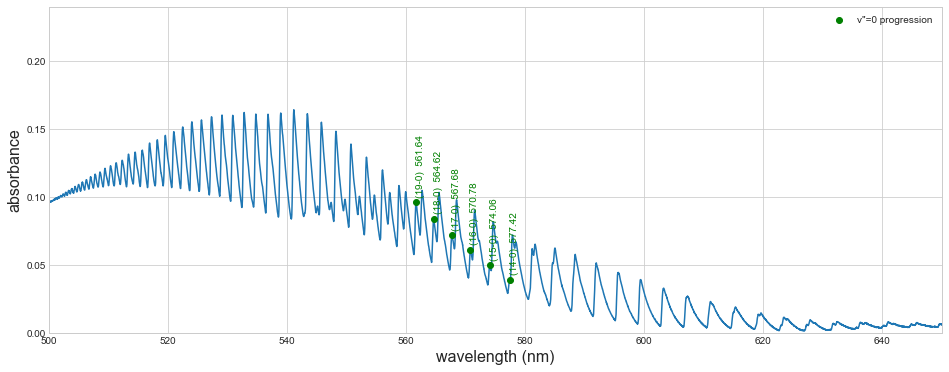

In [14]:
fig= plt.figure(figsize=(16,6))

plt.plot(x,y)

xmin = 500
xmax = 650
ymin = 0.00
ymax= 0.24
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

######### Choose the indices of the peaks associated with the main progression associated with v"=0
#s0 = [
#    104, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
#    139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,151, 152, 153, 154, 155, 156, 157, 158, 159, 160
#]     # Complete the list of indices
#offset0 = 14       # Update the offset to assign the upper quantum number

s0 = [104, 107, 109, 111, 113, 115]     # Complete the list of indices
offset0 = 14       # Update the offset to assign the upper quantum number
#########

s0_x = []
s0_y = []
v0 = []

for i in range(len(s0)):
    s0_x.append(x[peaks[0][s0[i]]])
    s0_y.append(y[peaks[0][s0[i]]])
    v0.append(i + offset0) 
    stri = '({}-0)  {:.5}'.format(v0[i],s0_x[i])
    plt.text(s0_x[i],s0_y[i]+0.005,stri,rotation=90,color='g')
    
plt.plot(s0_x,s0_y,'go',label= 'v\"=0 progression')
plt.xlabel('wavelength (nm)', size=16)
plt.ylabel('absorbance',size=16)
plt.legend()
plt.show()

The code below will convert the picked wavelengths (nm) to wavenumber (cm$^{-1}$) and store them in the array `energy`. Create arrays `vp` and `vpp` (vee-prime $v'$ and vee-double-prime, $v''$). A plot of the wavenumber of the members of the main progression against $x = v' + 0.5$ will be close to a parabola. 

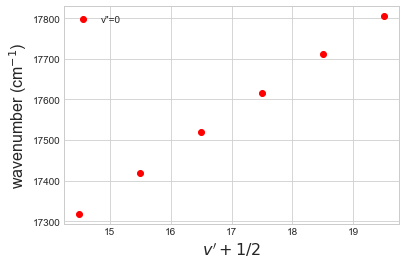

In [15]:
energy = np.array([],dtype=np.float64)
vp = np.array([],dtype=np.float64)
vpp = np.array([],dtype=np.int64)

for i in range(len(v0)):
    energy = np.append(energy,1e7/s0_x[i]) ## this is the array of wavenumbers of transitions
    vp = np.append(vp,v0[i]) ## this is the array of v'
    vpp = np.append(vpp,0) ## this is the array of v"

plt.plot(vp + 0.5,energy,'ro',label='v\"=0')
plt.xlabel('$v\' + 1/2$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

Fit this with a quadratic curve and determine estimates for $\omega_e'$, $\omega_ex_e'$ and $\bar{\nu}_L$. *Refer to the introduction for the necessary equations*

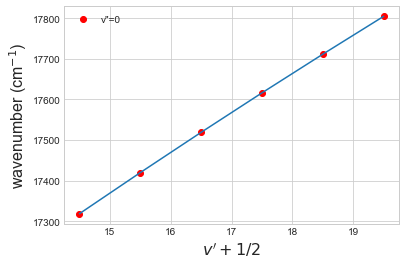

In [16]:
##fit a quadratic
def func(x,a,b,c):
    return a*x**2 + b*x + c

optP, pcov = opt.curve_fit(func, vp+0.5, energy)

plt.plot(vp+0.5,energy,'ro',label='v\"=0')
plt.plot(vp+0.5,func(vp+0.5,*optP))
plt.xlabel('$v\' + 1/2$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

In [17]:
print('we\' = ',optP[1],'+/-',2*pcov[1][1]**0.5,'cm-1') #adjust indices
print('wexe\' = ',optP[0],'+/-',2*pcov[0][0]**0.5,'cm-1') #adjust indices
#vmax = optP[1]/(2*optP[0])-0.5 #adjust indices
vmax = -optP[1]/(2*optP[0])-0.5 #adjust indices
print('maximum v =', vmax) 
print('nu_L =',func(vmax+0.5,*optP), 'cm-1') #adjust indices

we' =  130.90459168477176 +/- 7.930639506945686 cm-1
wexe' =  -0.9910420884365145 +/- 0.23303936826953986 cm-1
maximum v = 65.54391135965231
nu_L = 19951.59386456948 cm-1


---
### ASSIGN OTHER PROGRESSIONS
Assign the peaks in the $v''=1$ and $v''=2$ progressions analogously to $v''=0$. Use the incomplete code below.

In [18]:
#v"=1
#s1 = [103, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128]     
#offset1 = 16
## For global fit
s1 = [103, 106, 108, 110]     
offset1 = 16

#v"=2
s2 = [89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 102, 105]
offset2 = 8

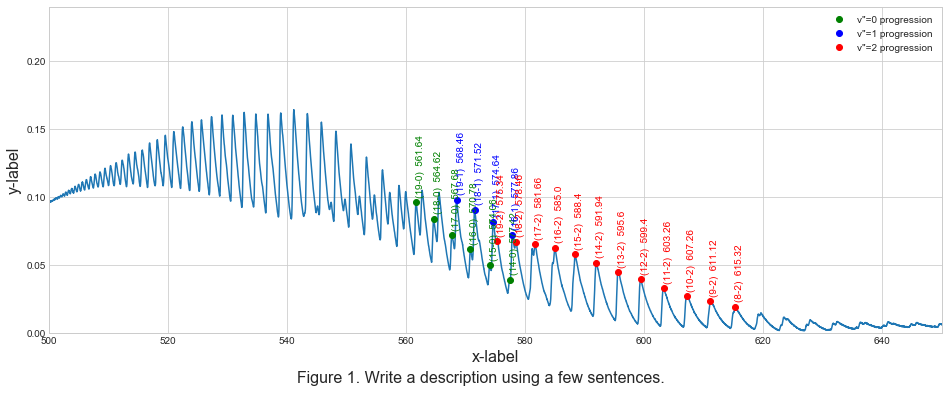

In [19]:
# Global plot of all progressions
fig = plt.figure(figsize=(16,6))

plt.plot(x,y)
plt.plot(s0_x,s0_y,'go',label= 'v\"=0 progression')
for i in range(len(s0)):
    stri = '({}-0)  {:.5}'.format(v0[i],s0_x[i])
    plt.text(s0_x[i],s0_y[i]+0.005,stri,rotation=90,color='g')

xmin = 500
xmax = 650
ymin = 0.00
ymax= 0.24
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

s1_x = []
s1_y = []
v1 = []

for i in range(len(s1)):
    s1_x.append(x[peaks[0][s1[i]]])
    s1_y.append(y[peaks[0][s1[i]]])
    v1.append(i + offset1)
    stri = '({}-1)  {:.5}'.format(v1[i],s1_x[i]) 
    plt.text(s1_x[i],s1_y[i]+0.005,stri,rotation=90,color='b')
    
plt.plot(s1_x,s1_y,'bo',label= 'v\"=1 progression')

s2_x = []
s2_y = []
v2 = []

for i in range(len(s2)):
    s2_x.append(x[peaks[0][s2[i]]])
    s2_y.append(y[peaks[0][s2[i]]])
    v2.append(i + offset2)
    stri = '({}-2)  {:.5}'.format(v2[i],s2_x[i]) 
    plt.text(s2_x[i],s2_y[i]+0.005,stri,rotation=90,color='r')
    
plt.plot(s2_x,s2_y,'ro',label= 'v\"=2 progression')

plt.xlabel('x-label', size=16)
plt.ylabel('y-label',size=16)
plt.legend()
plt.figtext(0.5,0.01,'Figure 1. Write a description using a few sentences.',size=16,ha='center')
plt.savefig('I2_absorption.png', dpi=150)
plt.show()

Append the arrays `energy`, `vp` and `vpp` with the new data and plot the progressions on the same graph. Ensure that each progression makes a smooth curve. 

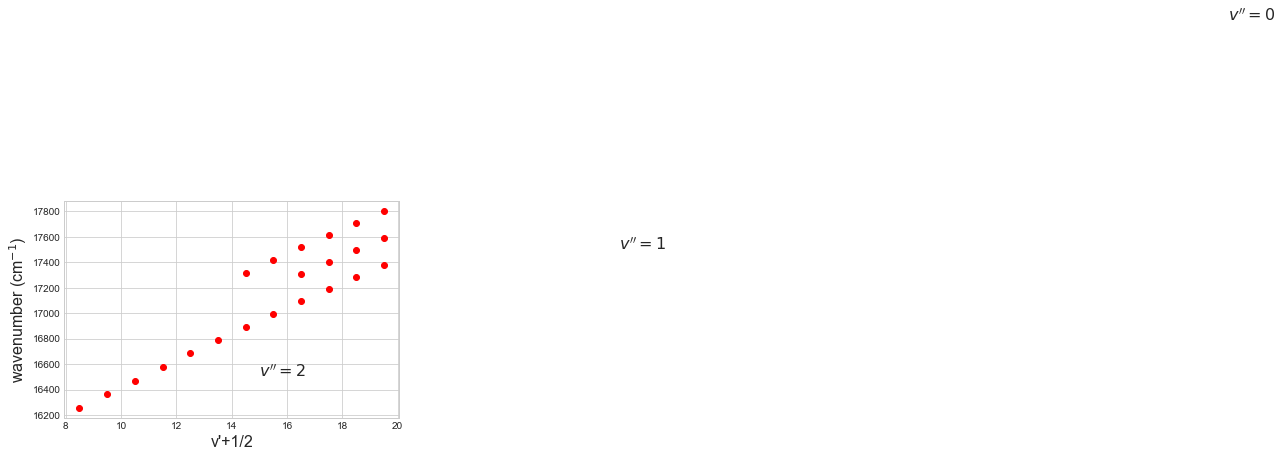

In [20]:
energy = np.array([],dtype=np.float64)
vp = np.array([],dtype=np.float64)
vpp = np.array([],dtype=np.int64)

for i in range(len(v0)):
    energy = np.append(energy,1e7/s0_x[i]) ## this is the array of wavenumbers of transitions
    vp = np.append(vp,v0[i]) ## this is the array of v'
    vpp = np.append(vpp,0) ## this is the array of v"
    
for i in range(len(v1)):
    energy = np.append(energy,1e7/s1_x[i])
    vp = np.append(vp,v1[i])
    vpp = np.append(vpp,1)
    
for i in range(len(v2)):
    energy = np.append(energy,1e7/s2_x[i])
    vp = np.append(vp,v2[i])
    vpp = np.append(vpp,2)

plt.plot(vp+0.5,energy,'ro')
plt.xlabel('v\'+1/2',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.text(50,19300,'$v\'\'=0$',size=16) #adjust x and y positions to label the progressions
plt.text(28,17500,'$v\'\'=1$',size=16) #adjust x and y positions to label the progressions
plt.text(15,16500,'$v\'\'=2$',size=16) #adjust x and y positions to label the progressions
plt.show()

Join the arrays `vp` and `vpp` into a $2\times N$ array `vees`, which contains the upper and lower vibrational state quantum numbers augmented by $1/2$. Globally fit all three progressions by defining a function of the quantum numbers.

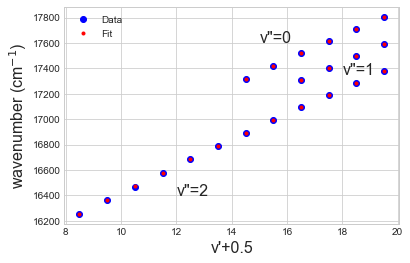

a =  -0.8700222673959355 +/- 0.06831241047618308 cm-1
b =  127.2170052798298 +/- 1.9882546164221173 cm-1
c =  1.6191895849543225 +/- 1.9078986851344462 cm-1
d =  -217.39531238256185 +/- 5.792458490146063 cm-1
e =  15764.522364589504 +/- 14.723390045067925 cm-1


In [22]:
vees = [vpp+0.5,vp+0.5]

# This is the function we are trying to fit to the data.
def func(x, a, b, c, d, e):
     return e + a*x[1]**2 + b*x[1] + c*x[0]**2 + d*x[0]

optP, pcov = opt.curve_fit(func, vees, energy)

plt.plot(vp+0.5,energy,'bo',label='Data')
plt.plot(vp+0.5,func(vees,*optP),'r.',label='Fit')

plt.xlabel('v\'+0.5',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.text(15,17600,'v\"=0',size=16)
plt.text(18,17350,'v\"=1',size=16)
plt.text(12,16400,'v\"=2',size=16)
plt.show()

print('a = ',optP[0],'+/-',2*pcov[0][0]**0.5,'cm-1')
print('b = ',optP[1],'+/-',2*pcov[1][1]**0.5,'cm-1')
print('c = ',optP[2],'+/-',2*pcov[2][2]**0.5,'cm-1')
print('d = ',optP[3],'+/-',2*pcov[3][3]**0.5,'cm-1')
print('e = ',optP[4],'+/-',2*pcov[4][4]**0.5,'cm-1')

To obtain reasonable values for the ground state, it is necessary to limit the upper state levels used in each progression to roughly the same value. Edit the `s0` and `s1` arrays to limit the upper level to the maximum observed in the $v''=2$ progression and repeat the global fit. Determine $D_0''$ and its uncertainty from the determined values of $\omega_e''$ and $\omega_e x_e''$.